#      Introdoction  

1. [Load and Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable Analysis](#4)
        * [Numerical Variable Analysis](#5)
3. [Basic Data Analysis](#6)
4. [Outlier Detection](#7)
5. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)

6. [Visualization](#11)
    * [Correlation Between Sibsp -- Pach -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch--Survived](#14)
    * [Pclass--Survived](#15)
    * [Age--Survived](#16)
    * [Pclass--Survived--Age](#17)
    * [Embarked--Sex--Pclass--Survived](#18)
    * [Embarked--Sex--Fare--Survived](#19)
    * [Fill Missing:Age Feature](#20)
7. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [PClass](#26)
    * [Sex](#27)
    
8. [Modelling](#28)
    * [Train_Test-Split](#29)
    * [Simple Logistic Regression](#30)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#31)
    * [Ensemble Modelling](#32)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


<a id= "1"> </a><br>
# Load and Check Data

In [2]:
#import the dataset
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengerId=test_df["PassengerId"]


In [3]:
train_df.columns

"""
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

"""


"\nIndex(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',\n       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],\n      dtype='object')\n\n"

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id= "2"> </a><br>
# Variable Description
1. **PassengerId** = Kişiye atanmış numara
2. **Survived** =  Yolcuların ölü (0) veya yaşıyor (1)
3. **Pclass** =  Yolcuların sınıfı 
4. **Name** =   Adları 
5. **Sex** =   Cinsiyetleri
6. **Age**  =   Yaşları
7. **SibSp** =  Kardeşler ve karı koca
8. **Parch** =  Aile veya çocuklar
9. **Ticket** =  Bilet numarası
10. **Fare** =  Bilet için ödenen para
11. **Cabin** =  Kabin kategorisi
12. **Embarked** = Yolcuların bindiği Limanlar (C=Cherburg , Q=Queenstown , S=Southampton)

 
 


In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 * float64(2):  Age - Fare         
 * int64(5): PassengerId - Survived - Pclass - SibSp - Parch
 * object(5): Name - Sex -  Ticket - Cabin - Embarked


 
 
 
 

<a id= "3"> </a><br>
# Univariate Variable Analysis
*   Categorical Variable  : 2 veya daha fazla seçeneği olan değişkenler = Survived , Sex , Pclass , Embarked , Name , Sibsp and Parch 
*   Numerical Variable    : Sayılardan oluşan değişkenler = Fare , age , passengerId
        
      
    

<a id= "4"> </a><br>
## Categorical Variable Analysis

In [7]:
def bar_plot(variable):
    """
        input: variable example : "Sex"
        output : bar plot & value count
    """
    #get feature
    var= train_df[variable] 
    #count number of categorical variable(value/sample)
    varValue=var.value_counts() #kaç kategori oldğunu ve kategorilerde kaç tane  veri olduğunu buluruz
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue) # x ve y e ekseninden oluşan bir bar plottur  
    plt.xticks(varValue.index , varValue.index.values)
    plt.ylabel("Frekans")
    plt.title(variable)
    plt.show()
    print(format(variable) + "\n"+  format(varValue))
    
    

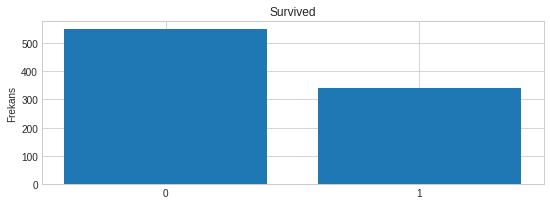

Survived
0    549
1    342
Name: Survived, dtype: int64


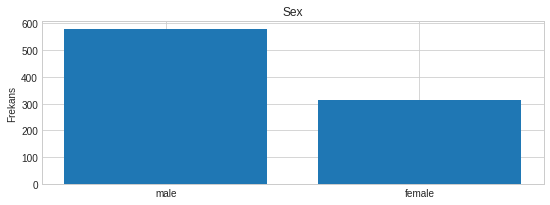

Sex
male      577
female    314
Name: Sex, dtype: int64


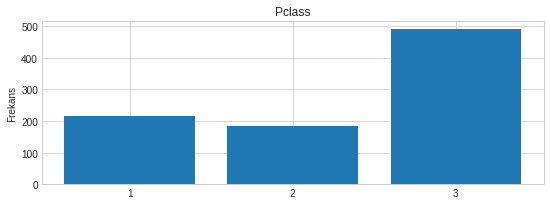

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


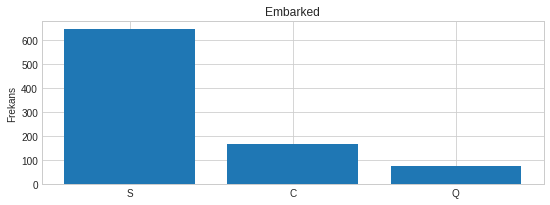

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


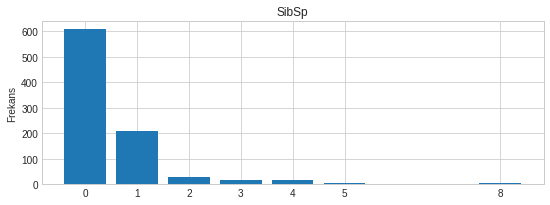

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


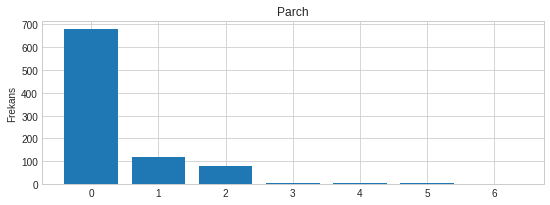

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1= [ "Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]
for c in category1:
    bar_plot(c)
    

In [9]:
category2=["Cabin","Name","Ticket"]
for c in category2:
    print(format(train_df[c].value_counts()))

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
E63            1
D48            1
B39            1
C30            1
E77            1
Name: Cabin, Length: 147, dtype: int64
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     1
Nicola-Yarred, Master. Elias                          1
Frauenthal, Mrs. Henry William (Clara Heinsheimer)    1
Fry, Mr. Richard                                      1
Allison, Master. Hudson Trevor                        1
                                                     ..
Shorney, Mr. Charles Joseph                           1
Calic, Mr. Petar                                      1
Brown, Miss. Amelia "Mildred"                         1
Collyer, Miss. Marjorie "Lottie"                      1
Compton, Miss. Sara Rebecca                           1
Name: Name, Length: 891, dtype: int64
CA. 2343        7
347082          7
1601            7
3101295         6
CA 2144         6
               ..
F.C.C. 13531

<a id= "5"> </a><br>
## Numerical Variable Analysis


In [10]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frekansı")
    plt.title(format(variable))
    plt.show()

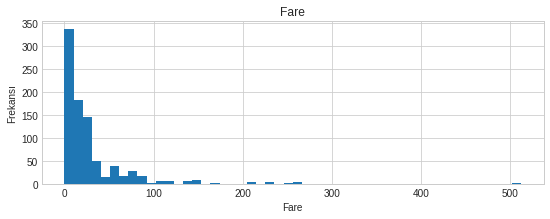

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


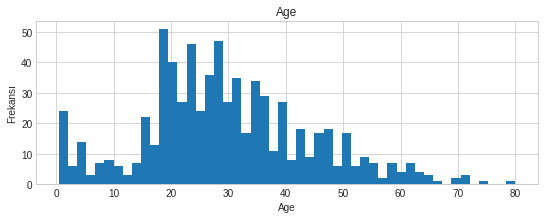

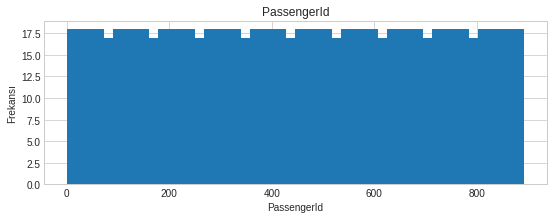

In [11]:
numericVar=["Fare","Age","PassengerId"]

for n in numericVar:
    plot_hist(n)
    

<a id= "6"> </a><br>
# Basic Data Analysis
* Bazı featurları birbirleriyle kıyaslayacağız
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
# Pclass - Survived


"""
	Pclass	Survived        1.Classtaki %62 olasılıkla bir yolcu hayatta kalmış
0	1	0.629630            2.Classtaki %47 olasılıkla bir yolcu hayatta kalmış
1	2	0.472826            3.Classtaki %24 olasılıkla bir yolcu hayatta kalmış
2	3	0.242363
"""

train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False) #ortalamasını gösteriyoruz 
# Pclass ve surviived featurelerimizi aldık Pclassa göre gruplandırdık . Bunların ortalamasını aldık ve sıralı bir şekilde yazdırdık

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
#sex-survived


"""
	Sex	Survived
0	female	0.742038    kadınlar %74 oranında hayatta kalmış
1	male	0.188908    ekrkler %18 oranında hayatta kalmış

"""

train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
#Sibsp-survived


"""

SibSp	Survived
1	1	0.535885       yanında 1 kişi olanların hayatta kalma oranı %53
2	2	0.464286       yanında 2 kişi olanların hayatta kalma oranı %46
0	0	0.345395       yanında 0 kişi olanların hayatta kalma oranı %34
3	3	0.250000       yanında 3 kişi olanların hayatta kalma oranı %25
4	4	0.166667       yanında 4 kişi olanların hayatta kalma oranı %16
5	5	0.000000       yanında 5 kişi olanların hayatta kalma oranı %0
6	8	0.000000       yanında 8 kişi olanların hayatta kalma oranı %0

"""


train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
#Parch - Survived 

"""

Parch	Survived
3	3	0.600000    yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 3 ise %60 oranında hayattayız demek
1	1	0.550847    yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 1 ise %55 oranında hayattayız demek
2	2	0.500000    yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 2 ise %50 oranında hayattayız demek
0	0	0.343658    yanımızda çccuk-yada aileüyemiz(parent ) yok  ise %34 oranında hayattayız demek
5	5	0.200000    yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 5 ise %20 oranında hayattayız demek
4	4	0.000000    yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 4 ise %0 oranında hayattayız demek
6	6	0.00000     yanımızda çccuk-yada aileüyemiz(parent ) varsa ve bu sayı 6 ise %0 oranında hayattayız demek
"""

train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id= "7"> </a><br>
# Outlier Detection

Veriyi bozan ayrık değerlerden kurtulmamız gererkir çünkü istatiksel sonuçta ayrık değer istetiği bozar misal 1,2,3,5,6,100 var burada ortalama yüksek olıyor ama değerlerimiz yüksek değil burada outlier data 100 dür bunu atmamız gerekir 


In [16]:
def detec_outlier(df,features):
    outlier_indices=[]
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        #3rd quartile
        Q3=np.percentile(df[c],75)
        #IQR 
        IQR=Q3-Q1
        #Outlie step
        outlier_step=IQR * 1.5
        #detec outlier and their indeces
        outlier_list_column=df[(df[c]< Q1 - outlier_step) | (df[c]>Q3 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_column)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list ( i for i , v in outlier_indices.items() if v > 2)
    return multiple_outliers
        

In [17]:
train_df.loc[detec_outlier(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
#drop outlier 
train_df = train_df.drop(detec_outlier(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id= "8"> </a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [19]:
#data frammleri birleştirmemiz gerekiyor 
train_df_len=len (train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id= "9"> </a><br>
## Find Missing Value


In [21]:
train_df.columns[train_df.isnull().any()] #hangi column larda null değeri var tespit ediyoruz

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train_df.isnull().sum() 
"""
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

"""

'\nPassengerId       0\nSurvived        418\nPclass            0\nName              0\nSex               0\nAge             256\nSibSp             0\nParch             0\nTicket            0\nFare              1\nCabin          1007\nEmbarked          2\ndtype: int64\n\n'

<a id= "10"> </a><br>
## Fill Missing Value
* Embarked has 2 missi
* Fare has only 1

In [23]:
#embarked in veride nerede ?
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


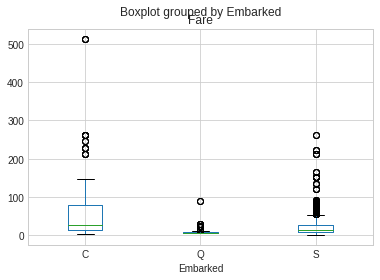

' \nBurada çıkan sonuçları değerlendirdiğimizde \nQ limanında binenler çok az para ödemişler . büyük ihtimal bunlar 3.sınıf insanlar \nS limanında binenler  biraz daha para vermişler bunlarda büyük ihrimal 2. insanlar\nC limannda ise genelde yüksek fiyat ödeyenler var medyan değerkeri 100 ün biraz altında  \n\nBizim üst taraftaki embarked değerlerini kıyasladığımızda orada fare kısmında 80.0 değeri vardı buda bizim bu aşşağıdaki tablomuzda\ngösteriyor ki bun insanlarlar muhtemelen C limanından bindiler gemiye\nbunun için burada kayıp değer olarak verilen embarked değerini biz burada C limanından binmiş olarak verebiliriz \n\n\n'

In [24]:
#fare kullanarak embarked hakkında fikir sahibi olabiliriz
train_df.boxplot(column="Fare",by="Embarked")
plt.show()


""" 
Burada çıkan sonuçları değerlendirdiğimizde 
Q limanında binenler çok az para ödemişler . büyük ihtimal bunlar 3.sınıf insanlar 
S limanında binenler  biraz daha para vermişler bunlarda büyük ihrimal 2. insanlar
C limannda ise genelde yüksek fiyat ödeyenler var medyan değerkeri 100 ün biraz altında  

Bizim üst taraftaki embarked değerlerini kıyasladığımızda orada fare kısmında 80.0 değeri vardı buda bizim bu aşşağıdaki tablomuzda
gösteriyor ki bun insanlarlar muhtemelen C limanından bindiler gemiye
bunun için burada kayıp değer olarak verilen embarked değerini biz burada C limanından binmiş olarak verebiliriz 


"""

In [25]:
train_df["Embarked"]=train_df["Embarked"].fillna("C")
# Embarked değeri boş olan 2 tane tek girdi vardı ve bunların fare leri 80 idi biz bunları yolcuların ödedikleri paraya göre 
#istatistiğini çıkarıp medyanlarını  karşılaştığımızda  gördük ki faar yani ödedikleri para miktarı yüksek olanlar(80'de bu sınıfta) C limannda binmişler 
#bizde bu boş olan miisssing data değerlerine faar leri yani ödedikleri para 80 olduğu için bunları C limanı olarak yazdık
train_df[train_df["Embarked"].isnull()]
#kontrol ediyoruz 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
train_df[train_df["Fare"].isnull()] # burada fare değeri boş olan kim var buna bakıyoruz
#1033 nolu yolcunun fare değeri yokmuş diğer feature değerlreinden bazılarıda bilinmiyor 
#burada biziö bakaileceğimiz  husus var biri Pclass ı yani sınıfları diğeri ise hangi limandan bindiği
#Pclass ın 3 olması 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:

np.mean(train_df[train_df["Pclass"]==3]["Fare"]) # pclass değeri 3 olan yolcuların ortalama ödedileri ücrete bakıyoruz =12.7 
train_df["Fare"]=train_df["Fare"].fillna(np.mean( train_df [train_df ["Pclass"]==3 ] ["Fare"])) #NAN olan fare değerine yukarıda bulduğumuz ortalamayı yazıyoruz 
train_df[train_df["Pclass"].isnull()] # kontrol ediyoruz

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= "11"> </a><br>
# Visualization

<a id= "12"> </a><br>
## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived 

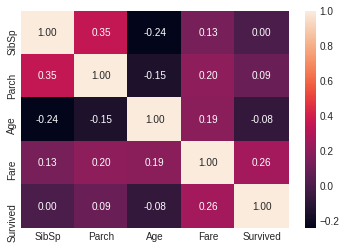

In [28]:
list1=["SibSp","Parch","Age" ,"Fare", "Survived"]
sns.heatmap(train_df[list1].corr(),annot=True , fmt=".2f")

Fare feature'si ile Fare arasında bir ilişki vardır (0.26)

<a id= "13"> </a><br>

## SibSp -- Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


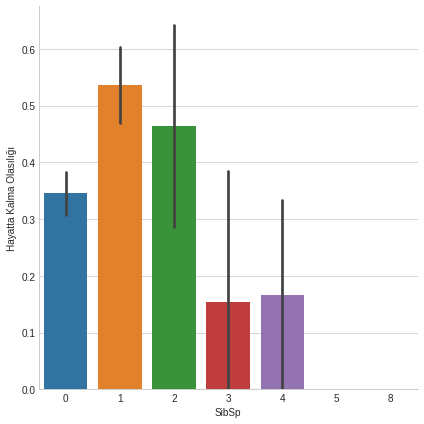

In [29]:
g = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar",size=6)
g.set_ylabels("Hayatta Kalma Olasılığı")
plt.show()

**Buradan gördüğümüz eğer 2 den fazla SibSp değerine yani ebeyn çocuk sayısına sahipse hayatta kalma olasılığı sert bir şekilde azalıyor** 

SibSp==0 veya 1 veya 2 ise daha hayatta kalma oranları daha fazla
Ve bu kategorileri açıklayan sağlayan yeni bir feature(özellik) oluşturabiliriz 


<a id= "14"> </a><br>
## Parch--Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


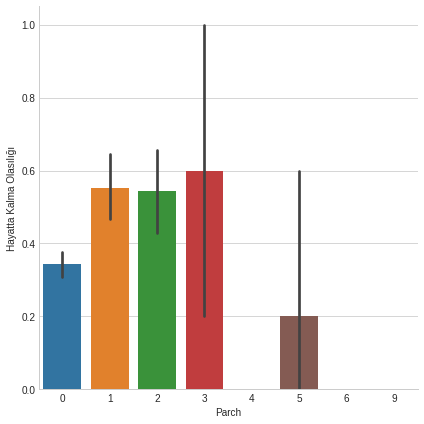

In [30]:
a= sns.factorplot(x="Parch",y="Survived",kind="bar",data=train_df,size=6)
a.set_ylabels("Hayatta Kalma Olasılığı")
plt.show()

0 ı bireyler olarak kabul edersek 
1,2,3 de küçük aile olarak kabul edersek 
4,5 i de büyük aileler dersek 

------ Bu grafikte bar plotların üstünde olan çizgi şunu gösterir örnek olarak 3'ü ele alırsak ortalama olarak 3 bireye sahip ailelerin hayatta kalma olaslığı 0.6 imiş ama o çizgi bize 3 kişiye sahip ailenin hayatta kalma oranını 0.2-1.0 aralığında olabileceğini gösteriyor "Burada hayatta kalma olasılığı çok değişken büyük bir aralığa sahibiz"

1 çocuğu veya ebevyni olan ailelere bakar ise 0.5 ile 0.7 arasında olabileceğini görürüz



BURADA Parch ile SibSp yi 3 ten aşağısı ve yukarısı olarak   birleştirip ileride daha sonra bu özelliimizide ayırıp standart sağmamızın daha tutarlı olmasını sağlayabililiriz. 

<a id= "15"> </a><br>
## Pclass--Survived

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


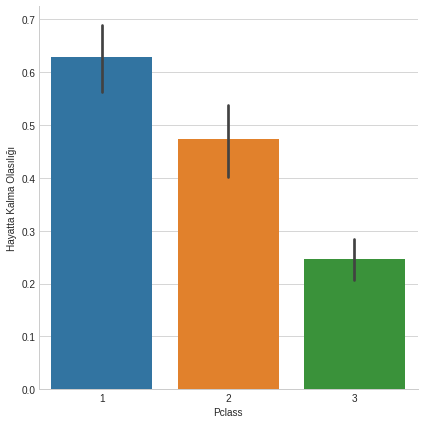

In [31]:
c = sns.factorplot(x="Pclass",y="Survived",data=train_df,kind="bar",size=6)
c.set_ylabels("Hayatta Kalma Olasılığı")
plt.show()



Pclass yolcularımızın seyahet ettiği sınıflardı 
Burada gördüğümüzde 1.klasta hayatta kalma oranı en yüksek dünyanın acı gerçeği....
Burada değerlerimizin ve özelliklerimizin çok olmayışından ötürü yeni bir özellik vs oluşturmamıza gerek yok kendi arasındaki ilişki gayet makul...

<a id= "16"> </a><br>

## Age--Survived

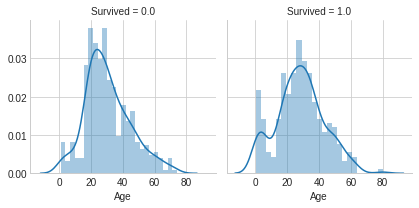

In [32]:
d = sns.FacetGrid(train_df,col="Survived")
d.map(sns.distplot,"Age",bins=25)
plt.show()



iki farklı tablo var  biri hayatta kalanlar diğeri ölenlerin dağılımının olduğu tablodur
hayatta kalanların kısmında çocukların belirgin bir şekilde hayatta kalma oranı yüksektir
age<= 10 yaşama oranı yüksek
Yaşlı insanlar (80) hayatta kaldılar
pik noktası yaşayanlarda 30-35  ölülerde 20-30 arası insanlarda ölüm oranı yüksek


Ölümden harici 15-35 yaş arasındaki yolcuların fazla olduğunu görebiliyoruz yani bizim yolcularımızın genel aralığı 15-35

Age featuremiz bizim eğitimiz için güzel bir değer aralığı
Bu featuremizde missing value vardı bunları buluğ fixlememiz lazım


<a id= "17"> </a><br>
# # Pclass--Survived--Age

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

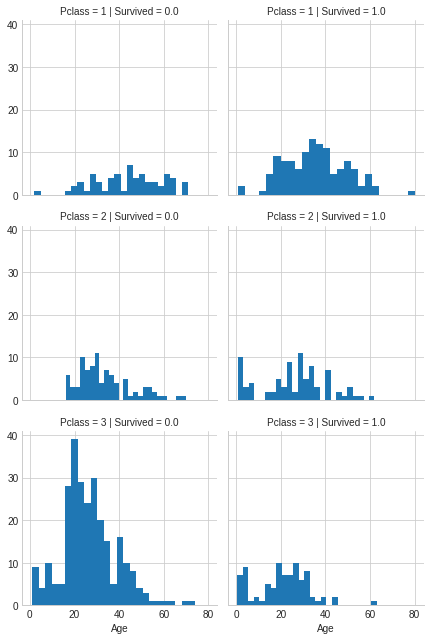

In [33]:
g = sns.FacetGrid(train_df,col="Survived",row="Pclass",size=3)
g.map(plt.hist,"Age",bins=25)
g.add_legend()
plt.show

Tablolar yukarıdan aşşağıya doğru Pclass ı yani yolcularımızın klasmanları(sınıflarını) belirtiyor  sütunlarımızın ilki ölümleri ikincisi hayatta kalmaları gösteriyor


Tablolara teker teker bakınca 3 sınıfımızdan olan yolcularımızın sayısının fazla olduğunu görebiliriz.
Tablolara bakınca ;

Pclass değeri 3 olan tablomuzda ölüm oranları çok yüksek 

Pclass 2 olan tablomuza bakınca ölüm oranları orta halli

Pclass 1 olan tablomuza bakınca ölüm oranlarının az olduğu görülüyor

**o halde Pclassdeğeri bizim modelimizi eğitmemizde önemli bir etkenimiz olucak**


<a id= "18"> </a><br>
# #  Embarked--Sex--Pclass--Survived

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


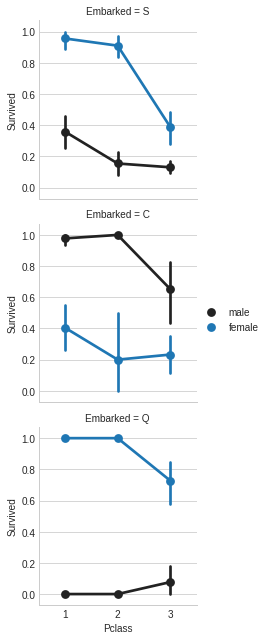

In [34]:
g= sns.FacetGrid(train_df,row="Embarked", size= 3)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

kadın yolcular erkek yolculardan daha fazla hayatta kalmışlar (sınıflandırma yaparken kullanılabilir) 
erkeklerinc limanından binenlerin hayatta alma olasılığıdaha yüksek
Cinsiyeti ve embarkedi doğrudan modelimizde kullanabiliriz.


<a id= "19"> </a><br>

# # Embarked--Sex--Fare--Survived 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


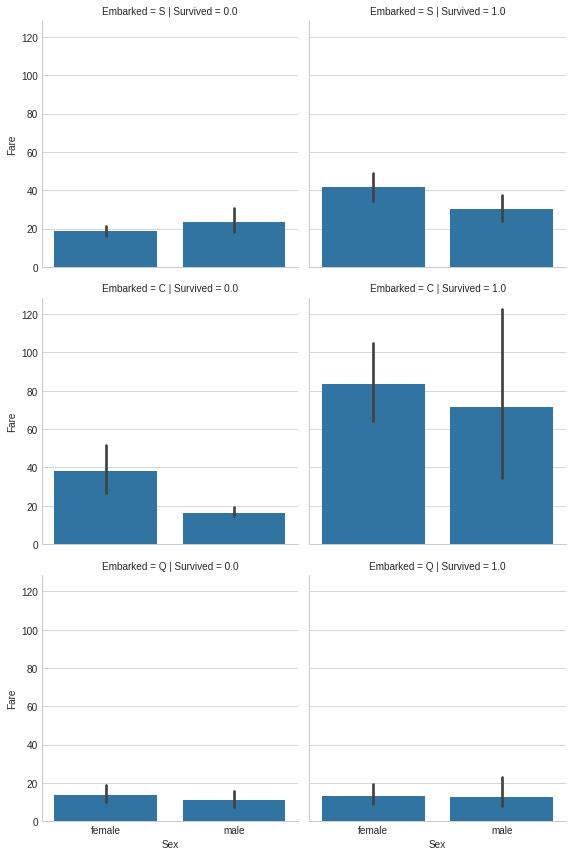

In [35]:
g= sns.FacetGrid(train_df,row="Embarked",col="Survived", size= 4)
g.map(sns.barplot,"Sex","Fare")
g.add_legend()
plt.show()

satırlar Fare 
S ve C limanında daha fazla ödeyenlerin hayatta kalma ihtimali daha yüksek 
genel olarak bakıcak olursak daha çok para ödeyince hayatta kalma olasılığı artıyor 

Fare featureni kategori olarak modelimizde kullanabiliriz 




<a id= "20"> </a><br>

## Fill Missing:Age Feature

In [36]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


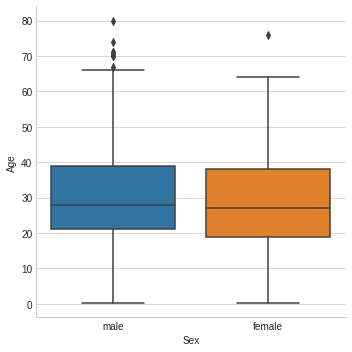

In [37]:
sns.factorplot(x="Sex",y="Age",data=train_df,kind="box")
plt.show()

orta çizgi medyanı ifade ediyor
Ama cinsiyet yaş paradigması bizim içi uygun değil çünkü arasında pek bir fark yok

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


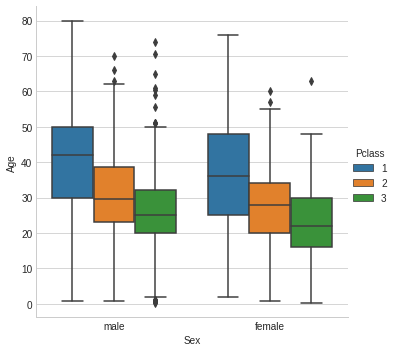

In [38]:
sns.factorplot(x="Sex",y="Age",hue="Pclass",data=train_df,kind="box")
plt.show()

1.sınıfların yaş ortalaması 2 den büyük pclassı 2 olanların kisi ise 3 ten büyük

Yani pclass benim age değerlerinde null olanlar için ortalamsı veya medyanı alarak null veya NAN değerleri doldurabileceğimiz güzel bir değişken olabilir.


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


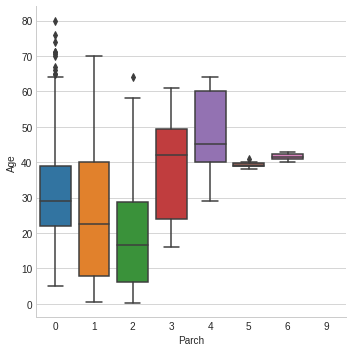

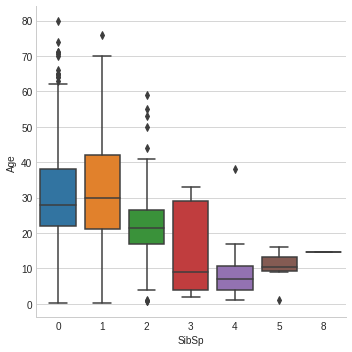

In [39]:
sns.factorplot(x="Parch",y="Age",data=train_df, kind="box")
sns.factorplot(x="SibSp",y="Age",data=train_df, kind="box")
plt.show()

In [40]:
train_df["Sex"]=[1 if i == "male" else 0 for i in train_df["Sex"]]

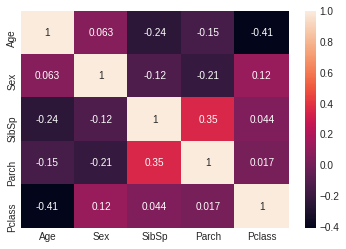

In [41]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

yaş-cinsiyet arasındaki ilişki 0.063 yani neredeyse sıfır demek yani ben yaşı predictionyapacaksam  cinsiyetle arasında bir korelasyon kuramıyorum 

Ama yaş ile parch sibsp  pclassarasında bir korelasyon İlişki vardır

In [42]:
#Age kısmında boşlukları doldurmak için kod yazmamız lazım bunun için ilk önce kaç tane null değer var görüntülemeyliyiz
index_nan_age=list(train_df["Age"][train_df["Age"].isnull()].index)
#index_nan_age
for i in index_nan_age:
    age_iliski=train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"])) ].median()
    #bazı değerlerdede prediction yapamadığımız oluyor bunun sebebi diğer değerlerdeki nan valuelr
    #bunun için eski kullandığımız en basit yöntem olan medyanlarıyla dolduralım
    age_median =train_df["Age"].median()
    if not np.isnan(age_iliski):
        train_df["Age"].iloc[i]=age_iliski
    else :
        train_df["Age"].iloc[i]=age_median

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
#yukarıda null değerlerini yok ettiğimiz age sütununa tekrak bakıyoruz null değer varmı diye
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= "21"> </a><br>
# Feature Engineering


<a id= "22"> </a><br>
## Name -- Title

In [44]:
train_df["Name"].head(10)


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [45]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]


In [46]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

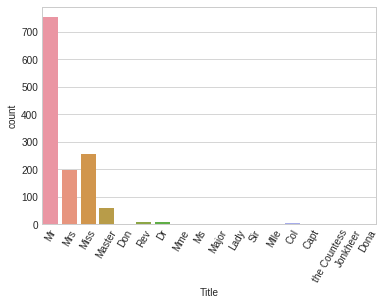

In [47]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [48]:
#Kategorikal Değerlere Dönüştürme

train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

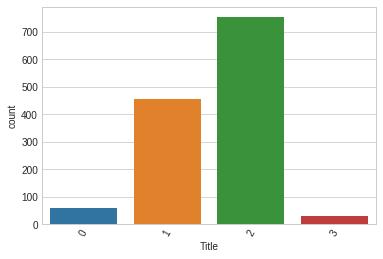

In [49]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


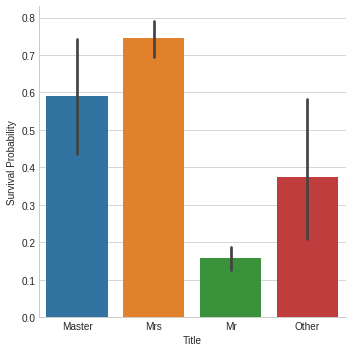

In [50]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [51]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [52]:
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [53]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id= "23"> </a><br>
## Family Size

In [54]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


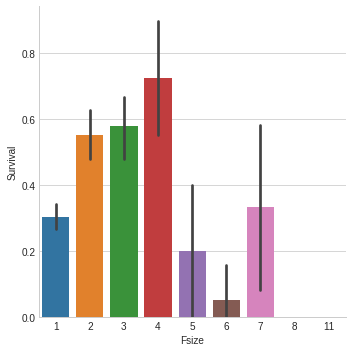

In [56]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [57]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [58]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


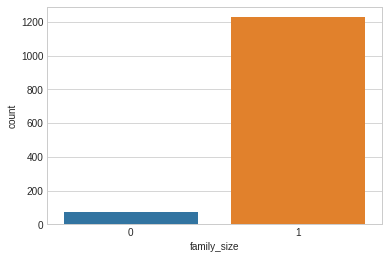

In [59]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


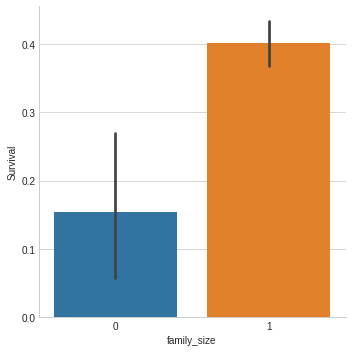

In [60]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Genelde Küçük Aileler Hayatta Kalıyomuş

In [61]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id= "24"> </a><br>
## Embarked 

In [62]:
train_df["Embarked"].head()


0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

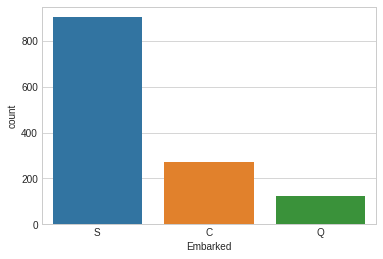

In [63]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [64]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id= "25"> </a><br>
## Ticket

In [65]:
train_df["Ticket"].head(20)


0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [66]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]


'A5'

In [67]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [68]:
train_df["Ticket"].head(20)


0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [69]:
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [70]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,1,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,1,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,1,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,0,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,0,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id= "26"> </a><br>
## PClass

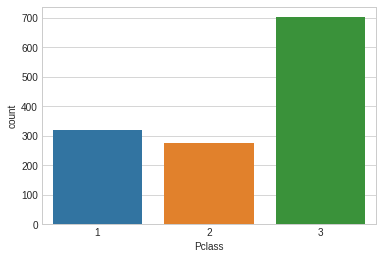

In [71]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()


In [72]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


## Sex

In [73]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [74]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

<a id= "27"> </a><br>
# Modelling

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id= "28"> </a><br>
## Train - Test Split

In [76]:
train_df_len

881

In [77]:
test = train_df[train_df_len:]
test.drop(labels=["Survived"],axis=1,inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [79]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id= "30"> </a><br>
## Simple Logistic Regression


In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id= "31"> </a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

1. Decision Tree
1. SVM
1. Random Forest
1. KNN
1.  Logistic Regression

In [81]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [82]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.0min finished


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8203389830508474
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


0.7796610169491525


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.6s finished


Text(0.5, 1.0, 'Cross Validation Scores')

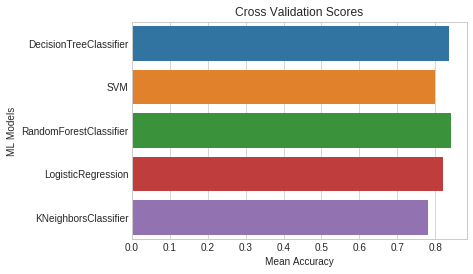

In [83]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# A

In [84]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8213058419243986
